# Spam Email NLP

## Import Data and Start Initial Investigation

In [1]:
#!pip install --user -U nltk

In [2]:
from textblob import TextBlob, Word
from wordcloud import WordCloud

In [3]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import LabelEncoder
import re 
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('data/spam.csv', encoding='latin-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# convert string labels to 1 or 0 
le = LabelEncoder()
df['target'] = le.fit_transform(df['Category'])
df.head()

,Category,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


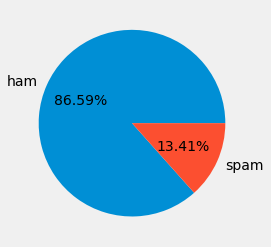

In [6]:
category = df['Category'].value_counts()
plt.pie(category.values, labels = category.index, autopct = '%.2f%%')
plt.show()

An inital look at the data, the emails are 86.59% ham and 13.41% spam 

## Cleaning

In [7]:
# stopwords = nltk.corpus.stopwords.words('english')
# ps = nltk.PorterStemmer()
# wn = nltk.WordNetLemmatizer()
# string.punctuation

In [8]:
# #lowercase
# df['clean_message'] = df['Message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# #remove whitespace
# df['clean_message'] = df['clean_message'].str.replace('[^\w\s]','')
# df['clean_message'].head()

In [9]:
# #Looking into stopwords
# from nltk.corpus import stopwords
# stop = stopwords.words('english')
# #how many stop words?
# df['stopwords'] = df['Message'].apply(lambda x: len([x for x in x.split() if x in stop]))
# df[['Message','stopwords']].head(10)
# df

In [10]:
# #Create a column with the count of stopwords
# df['stopwords'] = df['Message'].apply(lambda x: len([x for x in x.split() if x in stop]))
# df[['Message','stopwords']].head(10)

In [11]:
# #Remove the stopwords
# df['clean_message'] = df['clean_message'].apply(lambda x: " ".join(x for x in x.split() 
#                                                              if x not in stop))
# df['clean_message'].head()

In [12]:
# df.head() #display dataframe with the added columns

In [13]:
# #function to get the punctuation count 
# def count_punct(text):
#     count = sum([1 for char in text if char in string.punctuation])
#     return (text.count(" "))

# df['punct_count'] = df['Message'].apply(lambda x: count_punct(x))
# df.head()

## Tokenizing

In [14]:
# import nltk

In [15]:
# message_str = ' '.join(df['clean_message'].tolist())
# print(message_str)

In [16]:
# tokens = nltk.word_tokenize(message_str) #tokenizing 
# print(len(tokens))

Tokenizing creates individual tokens for each word in the data set. There are 52,802 individual tokens in the df.

## Stemming

In [17]:
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer("english")
# df['clean_message'] = df['Message'].str.split()
# df['clean_message'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word

In [18]:
# #Stem each word and create a new column for the stemmed data
# df['stem_message'] = df['clean_message'].apply(lambda x: [stemmer.stem(y) for y in x]) 
# df.head()

Stemming the data removes affixes from a word and ending up with the stem. So 'buying' becomes just the stem word 'buy'

## Cleaning Function:

In [19]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
def clean_message(message):
    message = "".join([word for word in message if word not in string.punctuation]) #takes away punctuation
    tokens = re.split('\W+', message) #tokens
    message = [ps.stem(word) for word in tokens if word not in stopwords] #stemming words
    return message

df['message_clean'] = df['Message'].apply(lambda x: clean_message(x.lower()))

In [22]:
df.head()

,Category,Message,target,message_clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goe, usf, live, around, tho..."


In [23]:
df['clean'] = df['message_clean'].apply(lambda x: ','.join(map(str, x)))
df.head() #mapped message_clean into a string to be able to run models

,Category,Message,target,message_clean,clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazi, avail, bugi, n, gre...","go,jurong,point,crazi,avail,bugi,n,great,world..."
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joke, wif, u, oni]","ok,lar,joke,wif,u,oni"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...","free,entri,2,wkli,comp,win,fa,cup,final,tkt,21..."
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, earli, hor, u, c, alreadi, say]","u,dun,say,earli,hor,u,c,alreadi,say"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goe, usf, live, around, tho...","nah,dont,think,goe,usf,live,around,though"


## Vectorizing & Modeling

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
import string

In [25]:
#setting our target & features 
X = df['clean']
y = df['target'] 

In [26]:
# generate a list of stopwords for TfidfVectorizer to ignore
stopwords_list = stopwords

In [27]:
# generate tf-idf vectorization 
def tfidf(X, y,  stopwords_list): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    vectorizer = TfidfVectorizer(stop_words=stopwords_list)
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer

In [28]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y, stopwords_list)

In [29]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [30]:
# a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    classifier.fit(tf_idf_train, y_train)
    train_preds = classifier.predict(tf_idf_train)
    test_preds = classifier.predict(tf_idf_test) # put into web app 
    return train_preds, test_preds

In [31]:
# Naive Bayes Classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Naive Bayes Classifier
print(confusion_matrix(y_test, nb_test_preds))
print("Accuracy Score", accuracy_score(y_test, nb_test_preds))
print("F1 Score", f1_score(y_test, nb_test_preds))

[[1207    0]
 [  46  140]]
Accuracy Score 0.9669777458722182
F1 Score 0.8588957055214724


Confusion matrix
[[1207    0]
 [  46  140]]


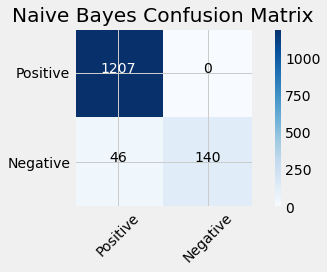

In [32]:
import itertools    
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, nb_test_preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],
                      title='Naive Bayes Confusion Matrix')

In [33]:
nb_test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
# generate predictions with Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier, tf_idf_train, tf_idf_test, y_train)

# evaluate performance of Random Forest Classifier
print(confusion_matrix(y_test, rf_test_preds))
print("Accuracy Score", accuracy_score(y_test, rf_test_preds))
print("F1 Score", f1_score(y_test, rf_test_preds))

[[1207    0]
 [  33  153]]
Accuracy Score 0.9763101220387652
F1 Score 0.9026548672566371


Confusion matrix
[[1207    0]
 [  33  153]]


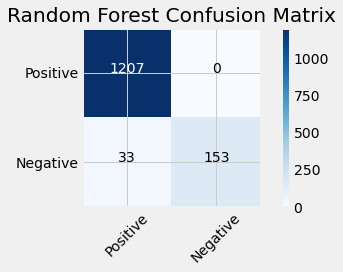

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf_test_preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Positive','Negative'],
                      title='Random Forest Confusion Matrix')

## Ham Dataframe and Spam Dataframe
Split the dataframe into spam and ham to look futher at the patterns in each of the dataframes 

In [36]:
df_ham = df.loc[df['Category'] == 'ham']
df_ham.head()

,Category,Message,target,message_clean,clean
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazi, avail, bugi, n, gre...","go,jurong,point,crazi,avail,bugi,n,great,world..."
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joke, wif, u, oni]","ok,lar,joke,wif,u,oni"
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, earli, hor, u, c, alreadi, say]","u,dun,say,earli,hor,u,c,alreadi,say"
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goe, usf, live, around, tho...","nah,dont,think,goe,usf,live,around,though"
6,ham,Even my brother is not like to speak with me. ...,0,"[even, brother, like, speak, treat, like, aid,...","even,brother,like,speak,treat,like,aid,patent"


In [37]:
df_spam = df.loc[df['Category'] == 'spam']
df_spam.head()

,Category,Message,target,message_clean,clean
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...","free,entri,2,wkli,comp,win,fa,cup,final,tkt,21..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,"[freemsg, hey, darl, 3, week, word, back, id, ...","freemsg,hey,darl,3,week,word,back,id,like,fun,..."
8,spam,WINNER!! As a valued network customer you have...,1,"[winner, valu, network, custom, select, receiv...","winner,valu,network,custom,select,receivea,å,9..."
9,spam,Had your mobile 11 months or more? U R entitle...,1,"[mobil, 11, month, u, r, entitl, updat, latest...","mobil,11,month,u,r,entitl,updat,latest,colour,..."
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,"[six, chanc, win, cash, 100, 20000, pound, txt...","six,chanc,win,cash,100,20000,pound,txt,csh11,s..."


## Ham Data

In [38]:
#Looking into stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
#how many stop words?
df_ham['stopwords'] = df_ham['Message'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_ham.head()

<ipython-input-38-fb1e3ab3c669>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['stopwords'] = df_ham['Message'].apply(lambda x: len([x for x in x.split() if x in stop]))


,Category,Message,target,message_clean,clean,stopwords
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazi, avail, bugi, n, gre...","go,jurong,point,crazi,avail,bugi,n,great,world...",4
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joke, wif, u, oni]","ok,lar,joke,wif,u,oni",0
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, earli, hor, u, c, alreadi, say]","u,dun,say,earli,hor,u,c,alreadi,say",2
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goe, usf, live, around, tho...","nah,dont,think,goe,usf,live,around,though",5
6,ham,Even my brother is not like to speak with me. ...,0,"[even, brother, like, speak, treat, like, aid,...","even,brother,like,speak,treat,like,aid,patent",6


In [39]:
#function to get the punctuation count 
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return (text.count(" "))

df_ham['punct_count'] = df_ham['Message'].apply(lambda x: count_punct(x))
df_ham.head()

<ipython-input-39-3d70da5b0335>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ham['punct_count'] = df_ham['Message'].apply(lambda x: count_punct(x))


,Category,Message,target,message_clean,clean,stopwords,punct_count
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[go, jurong, point, crazi, avail, bugi, n, gre...","go,jurong,point,crazi,avail,bugi,n,great,world...",4,19
1,ham,Ok lar... Joking wif u oni...,0,"[ok, lar, joke, wif, u, oni]","ok,lar,joke,wif,u,oni",0,5
3,ham,U dun say so early hor... U c already then say...,0,"[u, dun, say, earli, hor, u, c, alreadi, say]","u,dun,say,earli,hor,u,c,alreadi,say",2,10
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[nah, dont, think, goe, usf, live, around, tho...","nah,dont,think,goe,usf,live,around,though",5,12
6,ham,Even my brother is not like to speak with me. ...,0,"[even, brother, like, speak, treat, like, aid,...","even,brother,like,speak,treat,like,aid,patent",6,15


In [40]:
df_ham['stopwords'].describe()

count    4825.000000
mean        4.476891
std         4.782579
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        86.000000
Name: stopwords, dtype: float64

In [41]:
df_ham['punct_count'].describe()

count    4825.000000
mean       13.399378
std        11.620158
min         0.000000
25%         6.000000
50%        10.000000
75%        18.000000
max       170.000000
Name: punct_count, dtype: float64

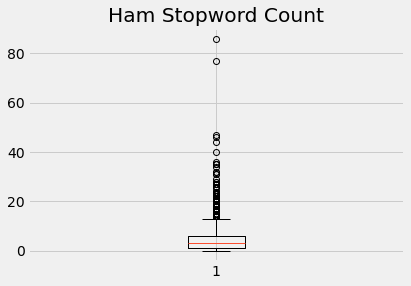

In [42]:
fig_ham, ax_ham = plt.subplots()
ax_ham.boxplot(df_ham['stopwords'])
ax_ham.set_title('Ham Stopword Count')
plt.show();

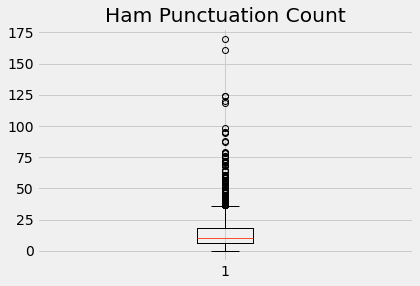

In [43]:
fig_ham1, ax_ham1 = plt.subplots()
ax_ham1.boxplot(df_ham['punct_count'])
ax_ham1.set_title('Ham Punctuation Count')
plt.show();

For the ham emails:
- Mean Punctuation: 13.40
- Median Punctuation: 10

- Mean Stopwords: 4.48
- Median Stopwords: 3.0

## Spam

In [44]:
#Looking into stopwords for spam emails
from nltk.corpus import stopwords
stop = stopwords.words('english')
#how many stop words?
df_spam['stopwords'] = df_spam['Message'].apply(lambda x: len([x for x in x.split() if x in stop]))
df_spam.head()

<ipython-input-44-02435f487645>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['stopwords'] = df_spam['Message'].apply(lambda x: len([x for x in x.split() if x in stop]))


,Category,Message,target,message_clean,clean,stopwords
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...","free,entri,2,wkli,comp,win,fa,cup,final,tkt,21...",5
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,"[freemsg, hey, darl, 3, week, word, back, id, ...","freemsg,hey,darl,3,week,word,back,id,like,fun,...",13
8,spam,WINNER!! As a valued network customer you have...,1,"[winner, valu, network, custom, select, receiv...","winner,valu,network,custom,select,receivea,å,9...",5
9,spam,Had your mobile 11 months or more? U R entitle...,1,"[mobil, 11, month, u, r, entitl, updat, latest...","mobil,11,month,u,r,entitl,updat,latest,colour,...",8
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,"[six, chanc, win, cash, 100, 20000, pound, txt...","six,chanc,win,cash,100,20000,pound,txt,csh11,s...",4


In [45]:
df_spam['punct_count'] = df_spam['Message'].apply(lambda x: count_punct(x))
df_spam.head()

<ipython-input-45-d716a6edc49f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam['punct_count'] = df_spam['Message'].apply(lambda x: count_punct(x))


,Category,Message,target,message_clean,clean,stopwords,punct_count
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...","free,entri,2,wkli,comp,win,fa,cup,final,tkt,21...",5,27
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,"[freemsg, hey, darl, 3, week, word, back, id, ...","freemsg,hey,darl,3,week,word,back,id,like,fun,...",13,31
8,spam,WINNER!! As a valued network customer you have...,1,"[winner, valu, network, custom, select, receiv...","winner,valu,network,custom,select,receivea,å,9...",5,25
9,spam,Had your mobile 11 months or more? U R entitle...,1,"[mobil, 11, month, u, r, entitl, updat, latest...","mobil,11,month,u,r,entitl,updat,latest,colour,...",8,28
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,"[six, chanc, win, cash, 100, 20000, pound, txt...","six,chanc,win,cash,100,20000,pound,txt,csh11,s...",4,25


In [46]:
df_spam['stopwords'].describe()

count    747.000000
mean       5.349398
std        2.985624
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       17.000000
Name: stopwords, dtype: float64

In [47]:
df_spam['punct_count'].describe()

count    747.000000
mean      22.812584
std        5.956923
min        0.000000
25%       21.000000
50%       24.000000
75%       27.000000
max       34.000000
Name: punct_count, dtype: float64

For the spam emails:
- Mean Punctuation: 22.81
- Median Punctuation: 24
- Mean Stopwords: 5.35
- Median Stopwords: 5.0

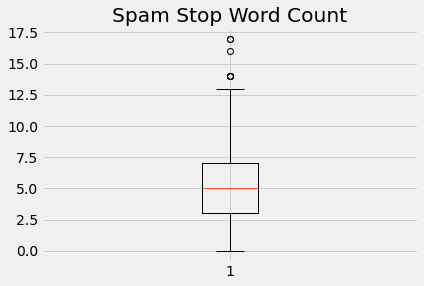

In [48]:
fig, ax = plt.subplots()
ax.boxplot(df_spam['stopwords'])
ax.set_title('Spam Stop Word Count')
plt.show();

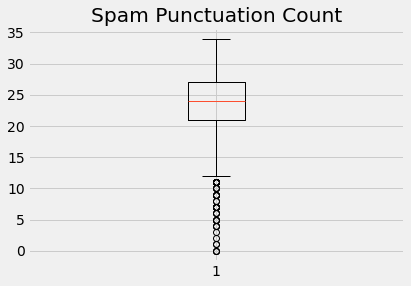

In [49]:
fig1, ax1 = plt.subplots()
ax1.boxplot(df_spam['punct_count'])
ax1.set_title('Spam Punctuation Count')
plt.show();

Notes: 
1. The spam emails have significantly more punctuation
2. The difference in stop words is not as much as I thought it would be

## Visualize Ham Vs Spam Findings

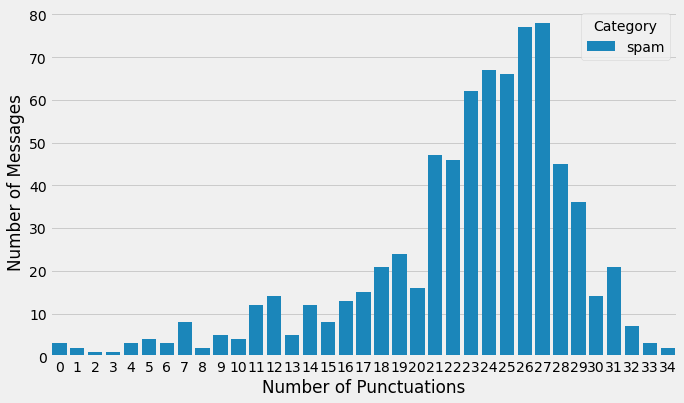

In [79]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_spam , x = 'punct_count', hue='Category')
ax.set(xlabel="Number of Punctuations", ylabel = "Number of Messages");

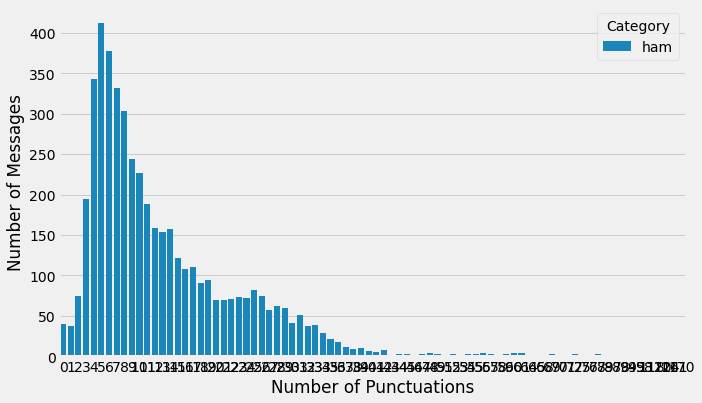

In [110]:
plt.figure(figsize=(10,6))
ax2 = sns.countplot(data=df_ham , x = 'punct_count', hue='Category')
ax2.set(xlabel="Number of Punctuations", ylabel = "Number of Messages");

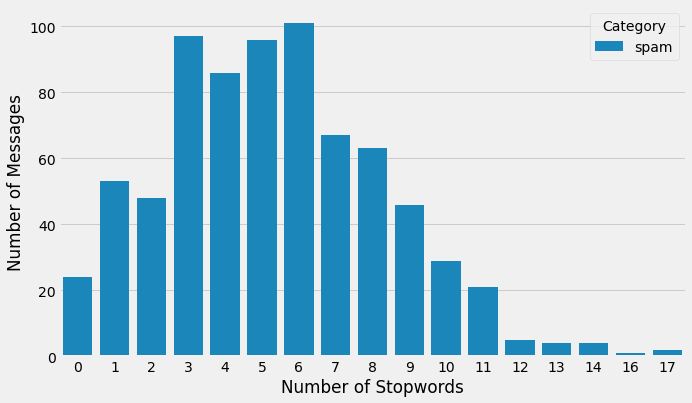

In [127]:
plt.figure(figsize=(10,6))
ax3 = sns.countplot(data=df_spam , x = 'stopwords', hue='Category')
ax3.set(xlabel="Number of Stopwords", ylabel = "Number of Messages");

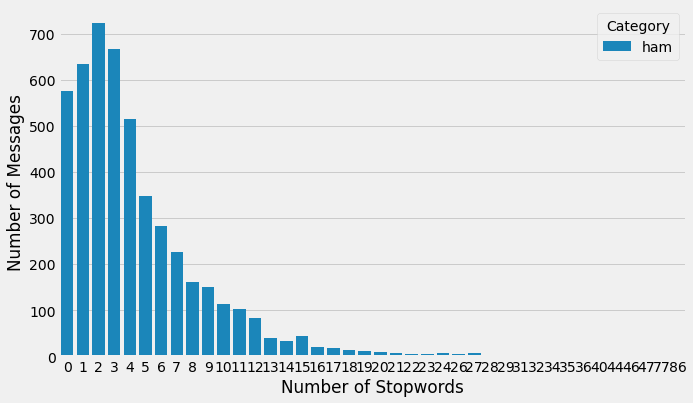

In [128]:
plt.figure(figsize=(10,6))
ax4 = sns.countplot(data=df_ham , x = 'stopwords', hue='Category')
ax4.set(xlabel="Number of Stopwords", ylabel = "Number of Messages");